### INTRODUCTION À LA MACHINE LEARNING AVEC PYTHON

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression

#### Charger le jeu de données

In [2]:
df = pd.read_csv('/home/donerick/Data-science/DATA/prostate_cancer_prediction.csv')

# les premieres lignes de df
df.head(5)

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,No,Yes,5.07,Normal,Benign,No,No,No,...,Moderate,No,No,Normal,45,No,46.0,No,No,Yes
1,2,68,No,Yes,10.24,Normal,Benign,Yes,No,No,...,Low,No,No,High,65,No,78.2,No,No,Yes
2,3,54,No,No,13.79,Normal,Benign,No,No,No,...,Low,No,No,Normal,61,No,21.1,No,No,Yes
3,4,82,No,No,8.03,Abnormal,Benign,No,No,No,...,Low,No,No,Normal,47,Yes,79.9,No,Yes,Yes
4,5,47,Yes,No,1.89,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,72,No,32.0,No,No,Yes


#### EDA(Exploratory Data Analysis)

In [3]:
df.describe()

,Patient_ID,Age,PSA_Level,BMI,Screening_Age,Prostate_Volume
count,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000,27945.000000
mean,13973.000000,64.459939,7.751599,26.511605,56.902308,47.755770
std,8067.170973,14.404755,4.175012,4.888293,10.118064,18.704286
min,1.000000,40.000000,0.500000,18.000000,40.000000,15.000000
25%,6987.000000,52.000000,4.130000,22.300000,48.000000,31.700000
50%,13973.000000,64.000000,7.750000,26.500000,57.000000,47.700000
75%,20959.000000,77.000000,11.320000,30.700000,66.000000,63.900000
max,27945.000000,89.000000,15.000000,35.000000,74.000000,80.000000


In [4]:
df.describe(include = ['object', "bool"])

,Family_History,Race_African_Ancestry,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,Pelvic_Pain,Back_Pain,Erectile_Dysfunction,...,Healthy_Diet,Smoking_History,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Follow_Up_Required,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
count,27945,27945,27945,27945,27945,27945,27945,27945,27945,27945,...,27945,27945,27945,27945,27945,27945,27945,27945,27945,27945
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,3,2,2,2,2,2,2,2
top,No,No,Normal,Benign,No,No,No,No,No,No,...,Yes,No,Low,No,No,Normal,No,No,No,Yes
freq,19604,22409,23742,19549,21054,19424,25087,22394,23669,16704,...,19579,19667,13897,16791,22318,19559,14035,21013,25183,23747


In [5]:
df.dtypes

Patient_ID                   int64
Age                          int64
Family_History              object
Race_African_Ancestry       object
PSA_Level                  float64
DRE_Result                  object
Biopsy_Result               object
Difficulty_Urinating        object
Weak_Urine_Flow             object
Blood_in_Urine              object
Pelvic_Pain                 object
Back_Pain                   object
Erectile_Dysfunction        object
Cancer_Stage                object
Treatment_Recommended       object
Survival_5_Years            object
Exercise_Regularly          object
Healthy_Diet                object
BMI                        float64
Smoking_History             object
Alcohol_Consumption         object
Hypertension                object
Diabetes                    object
Cholesterol_Level           object
Screening_Age                int64
Follow_Up_Required          object
Prostate_Volume            float64
Genetic_Risk_Factors        object
Previous_Cancer_Hist

In [6]:
## verifications des doublons
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
27940    False
27941    False
27942    False
27943    False
27944    False
Length: 27945, dtype: bool

In [7]:
df.shape

(27945, 30)

In [8]:
## valeurs manquantes
df.isnull().sum().sum()

np.int64(0)

In [9]:
##[{# selectionner les colonnes de type numerique
num_cols = df.select_dtypes(exclude=['object', "bool"]).columns
corr = df[num_cols].corr()


print(corr)

                 Patient_ID       Age  PSA_Level       BMI  Screening_Age  \
Patient_ID         1.000000 -0.002888   0.001804  0.003789      -0.000763   
Age               -0.002888  1.000000  -0.005709  0.000953       0.000310   
PSA_Level          0.001804 -0.005709   1.000000 -0.005168       0.001009   
BMI                0.003789  0.000953  -0.005168  1.000000       0.000363   
Screening_Age     -0.000763  0.000310   0.001009  0.000363       1.000000   
Prostate_Volume    0.002774  0.003164   0.005337  0.006297      -0.004384   

                 Prostate_Volume  
Patient_ID              0.002774  
Age                     0.003164  
PSA_Level               0.005337  
BMI                     0.006297  
Screening_Age          -0.004384  
Prostate_Volume         1.000000  


### Visualisation des données

Patient_ID


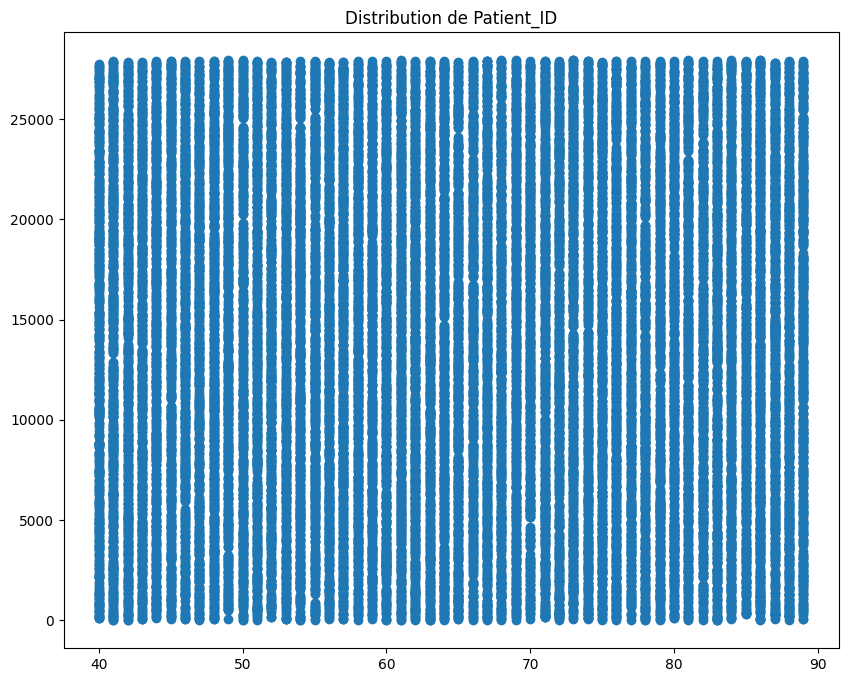

PSA_Level


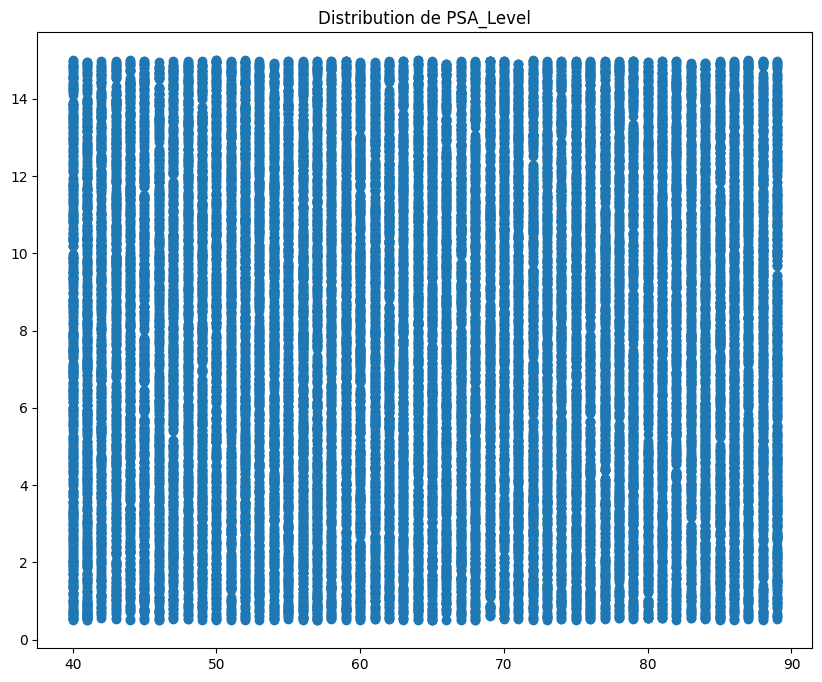

BMI


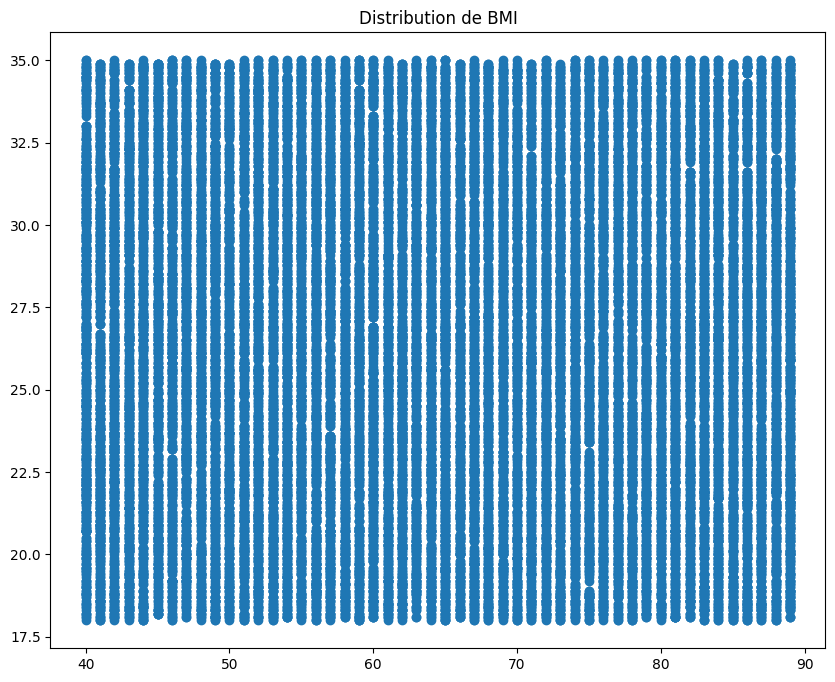

Screening_Age


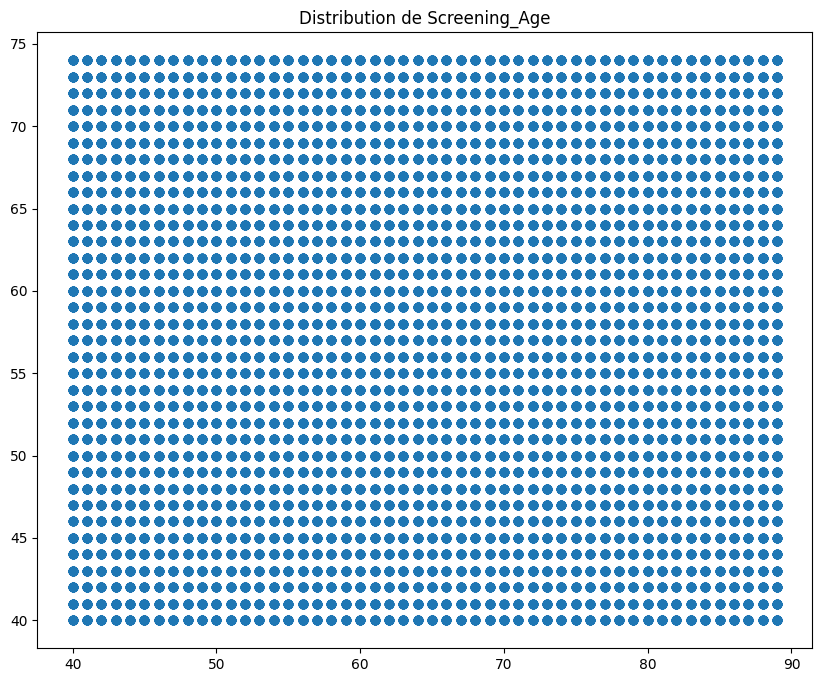

Prostate_Volume


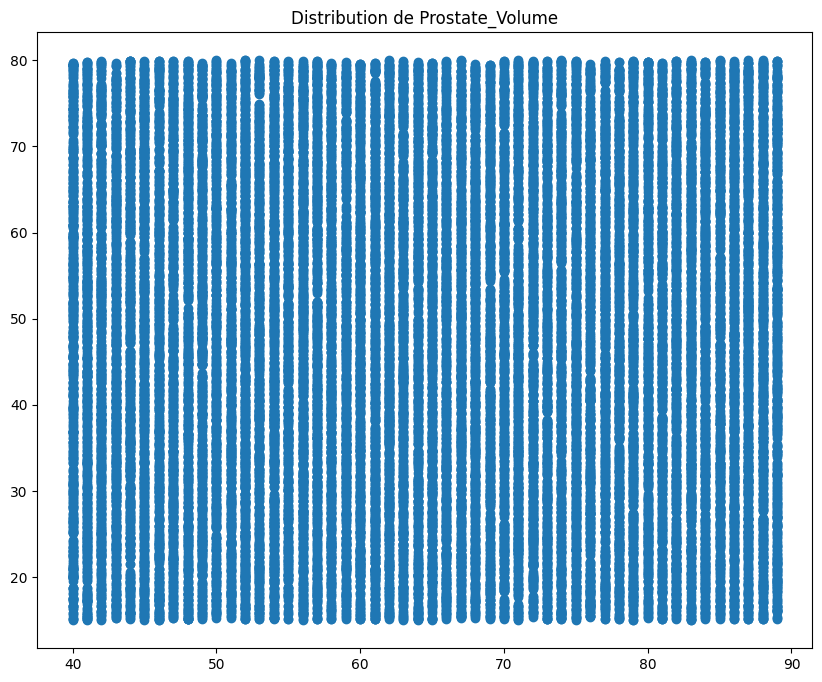

In [10]:
### des valeurs numeriques

for col in num_cols:
    if col !="Age":
        print(col)
        plt.figure(figsize=(10,8))
        plt.scatter(data =df,x="Age", y=col)
        plt.title(f'Distribution de {col}')
    plt.show()

Family_History


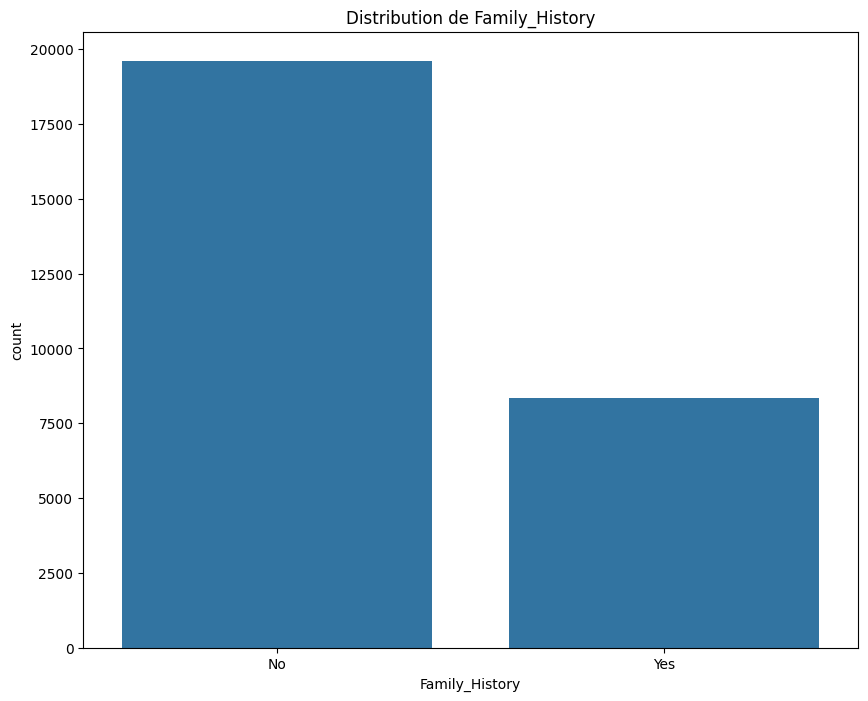

Race_African_Ancestry


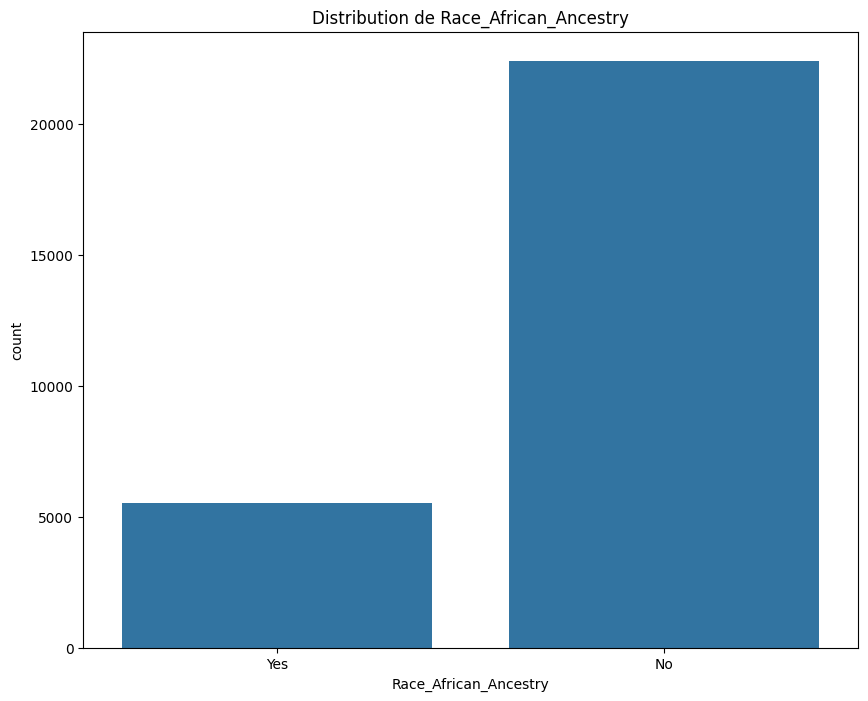

DRE_Result


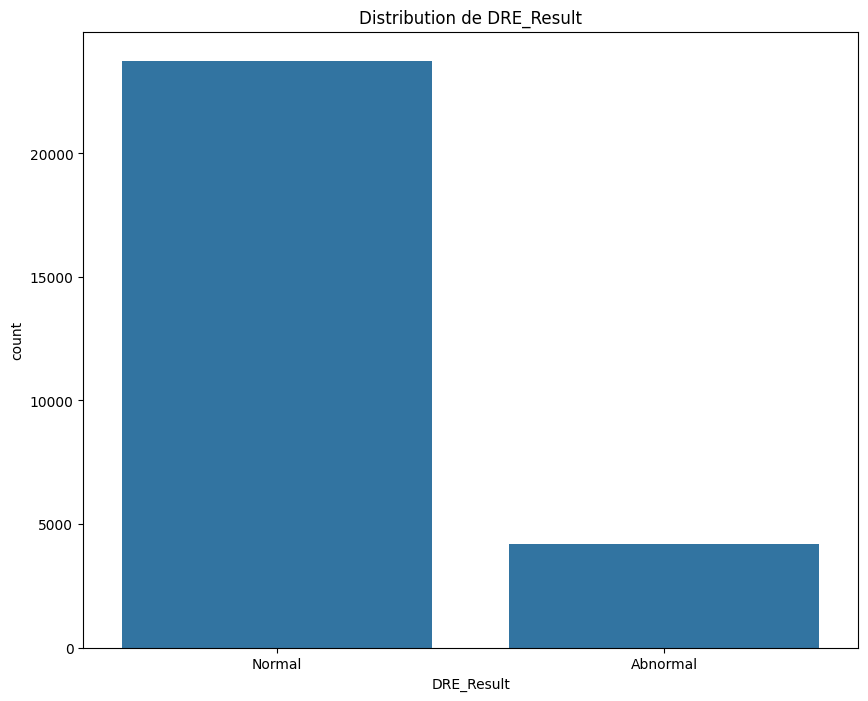

Biopsy_Result


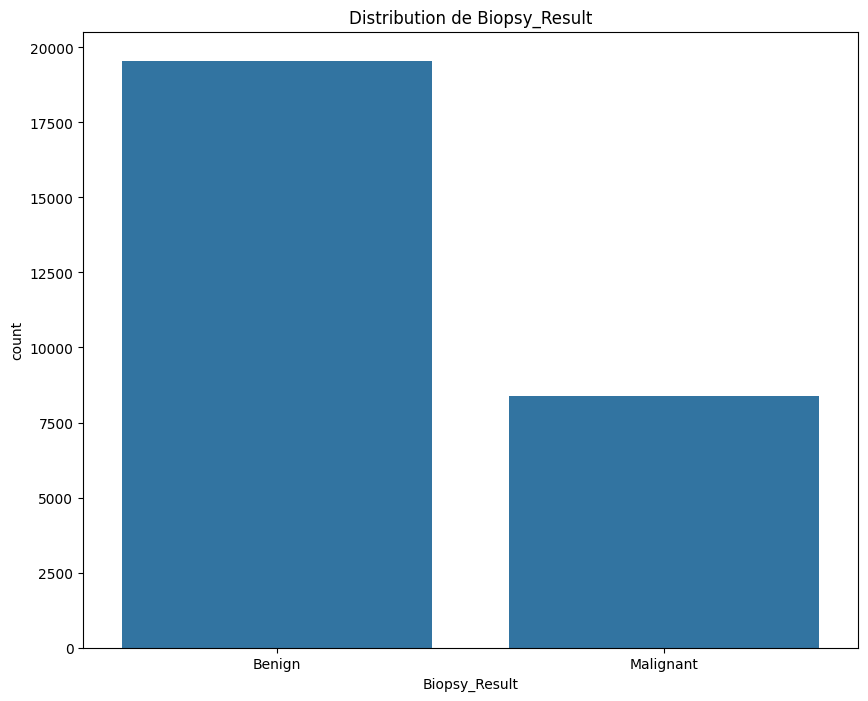

Difficulty_Urinating


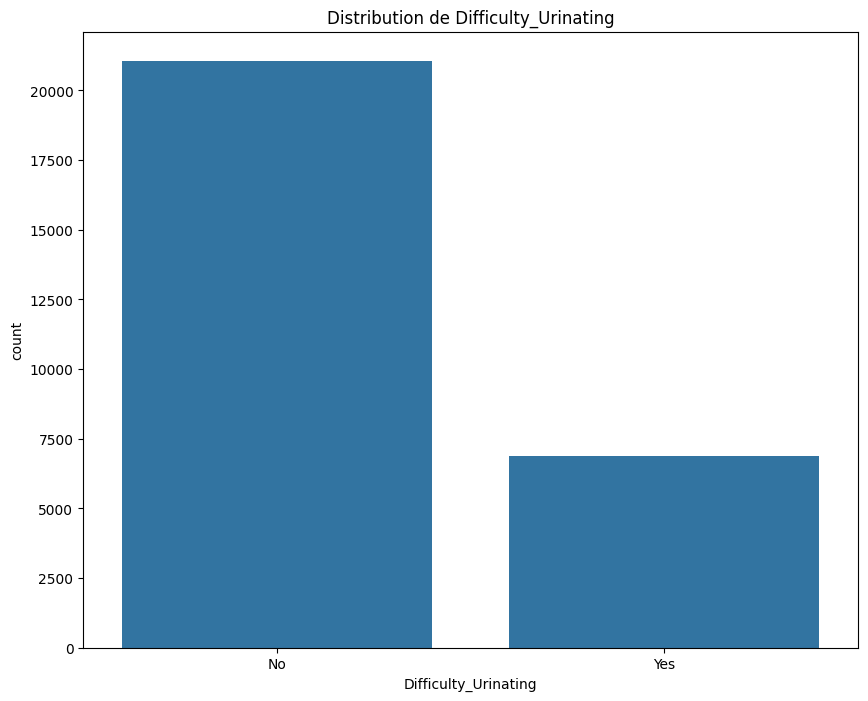

Weak_Urine_Flow


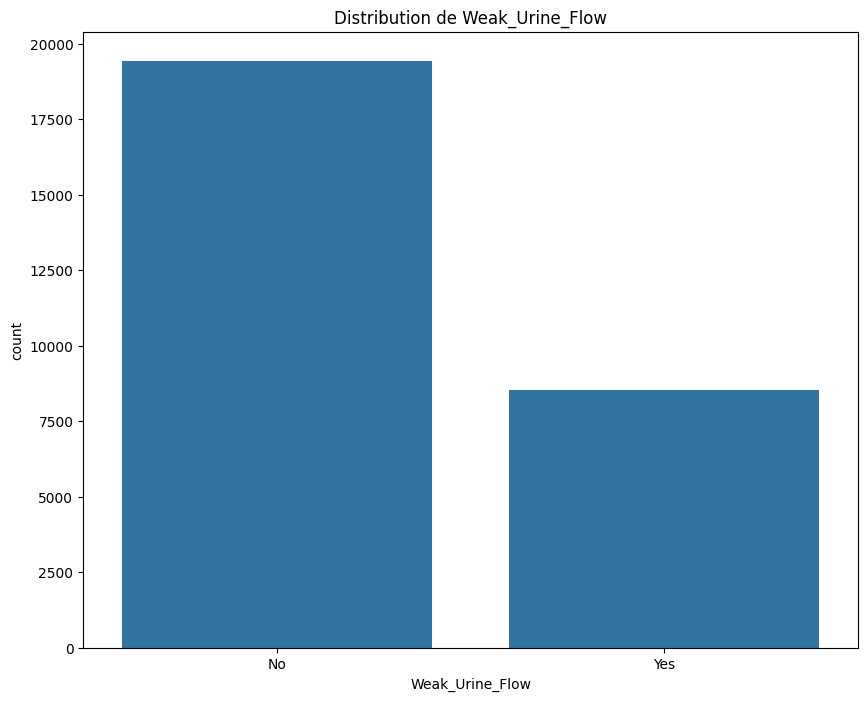

Blood_in_Urine


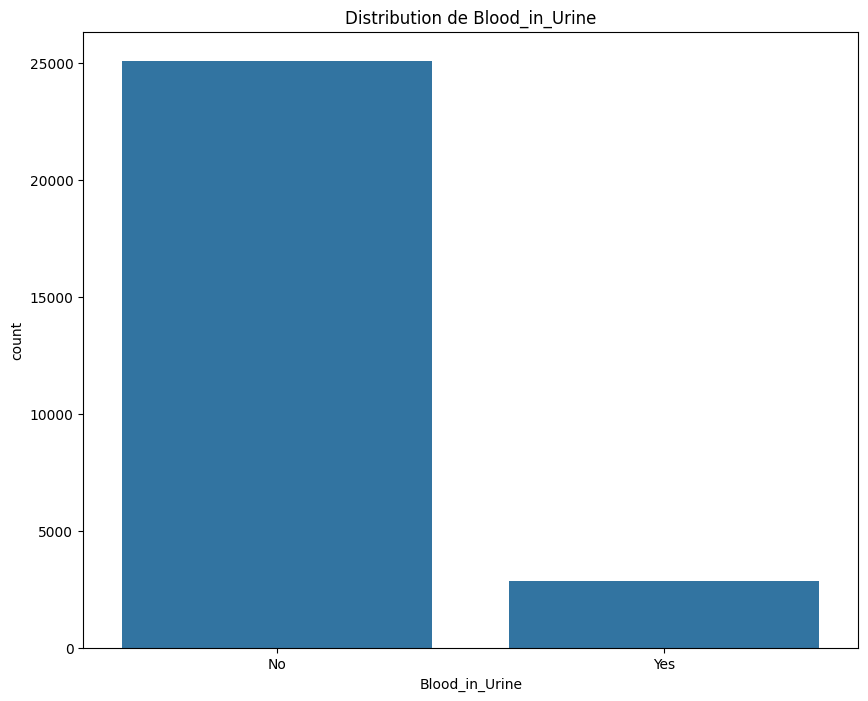

Pelvic_Pain


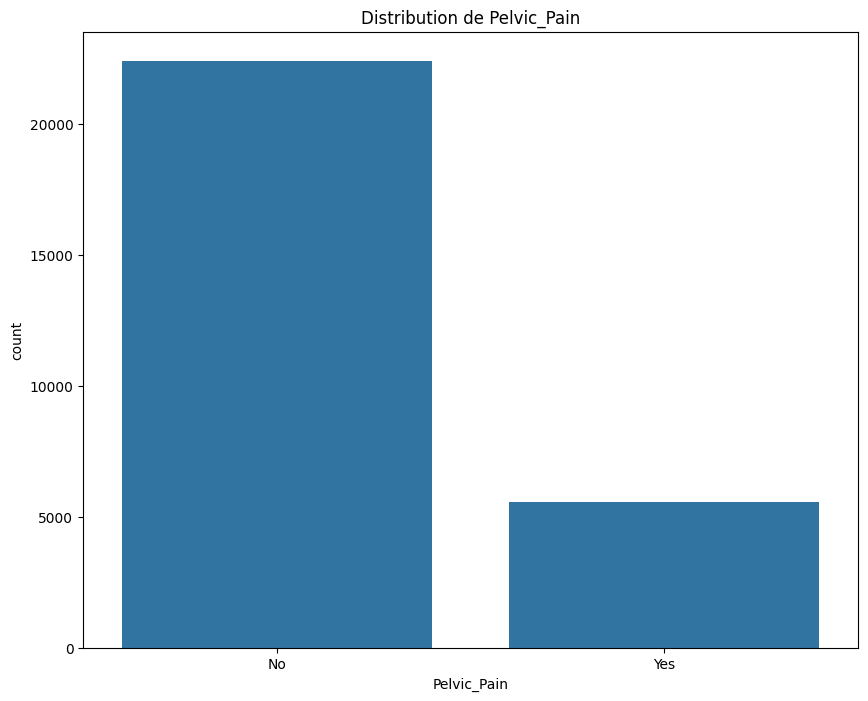

Back_Pain


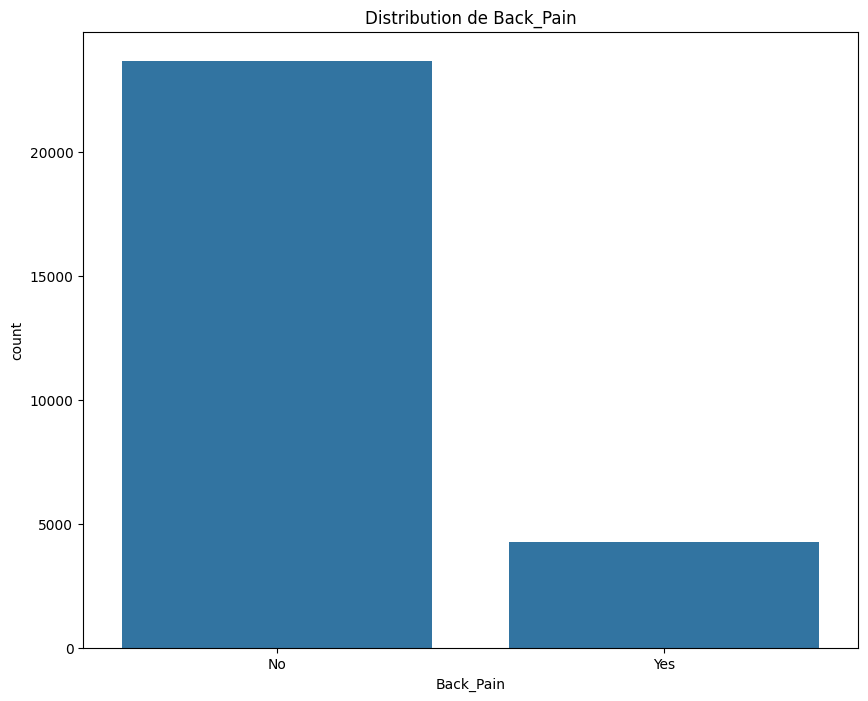

Erectile_Dysfunction


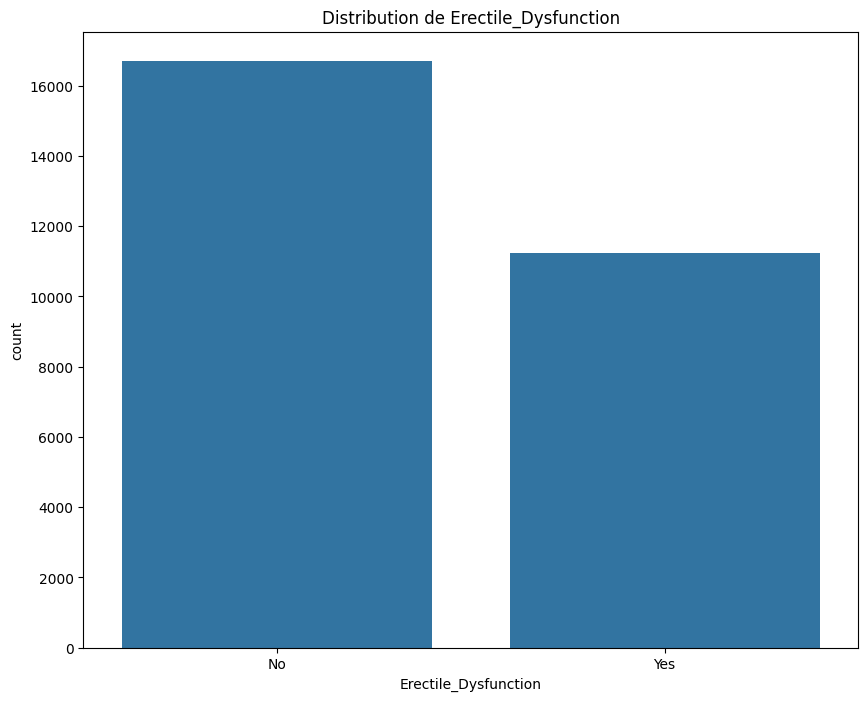

Cancer_Stage


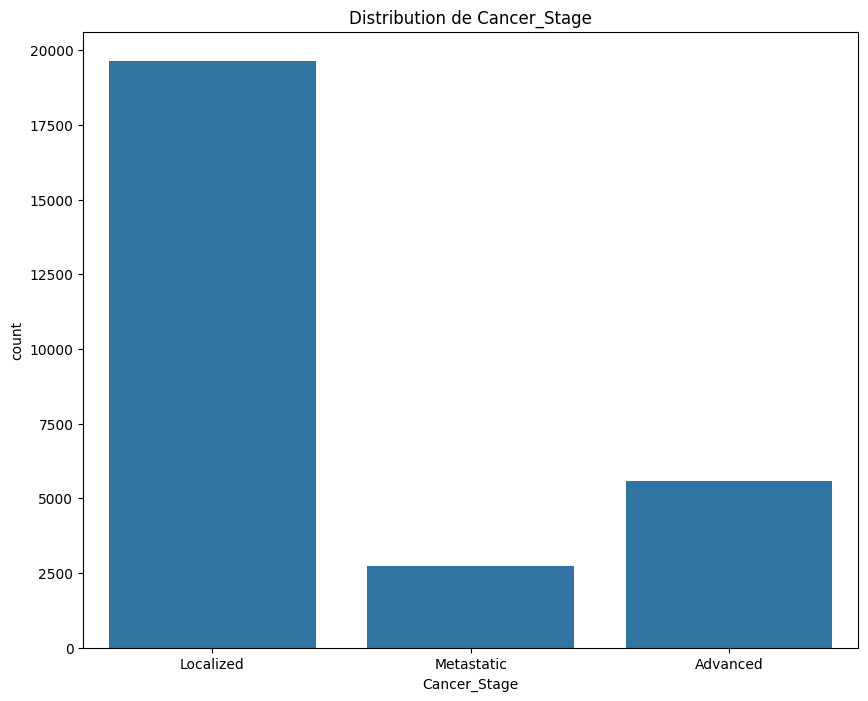

Treatment_Recommended


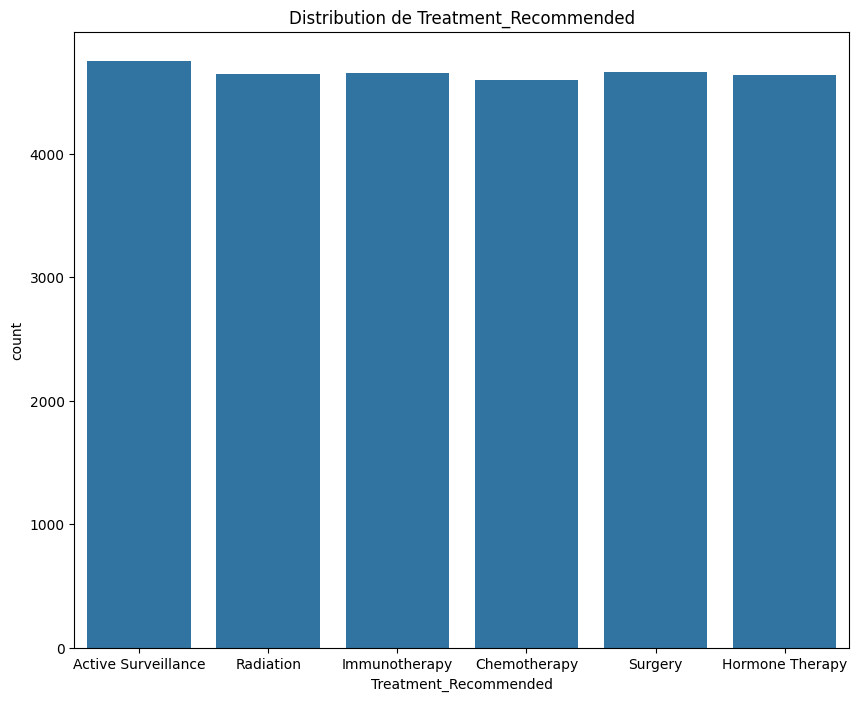

Survival_5_Years


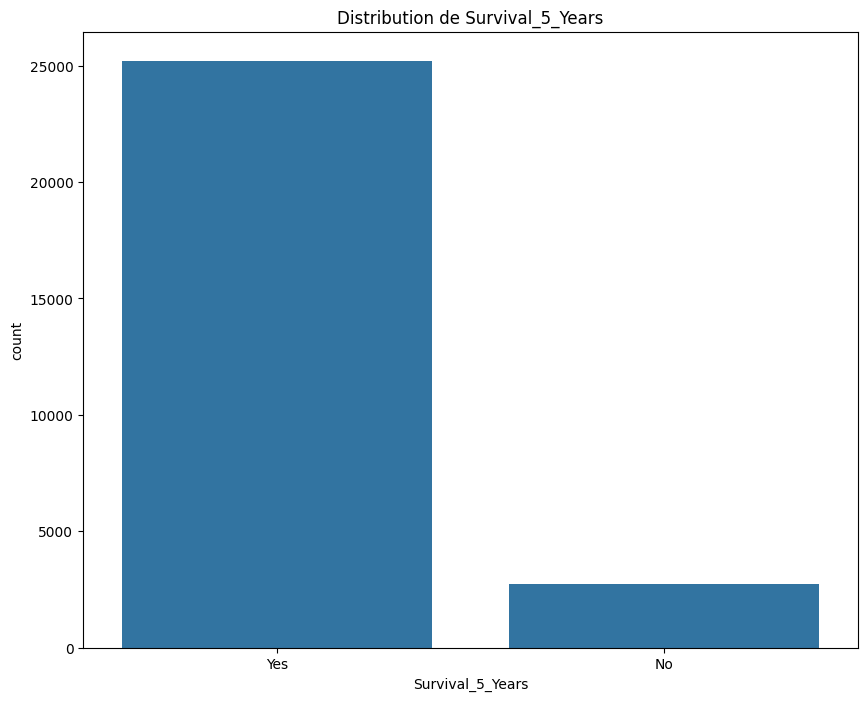

Exercise_Regularly


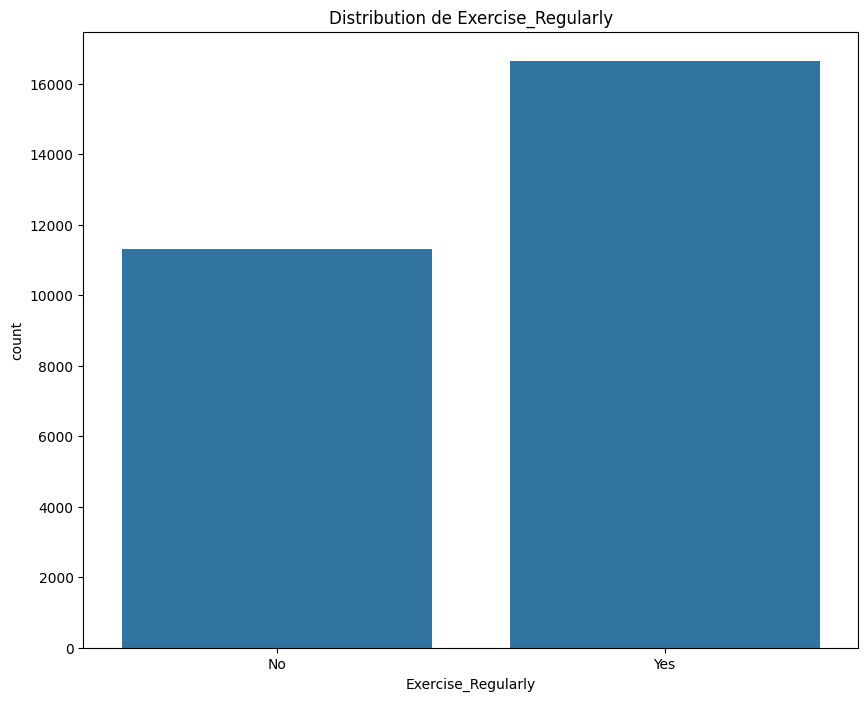

Healthy_Diet


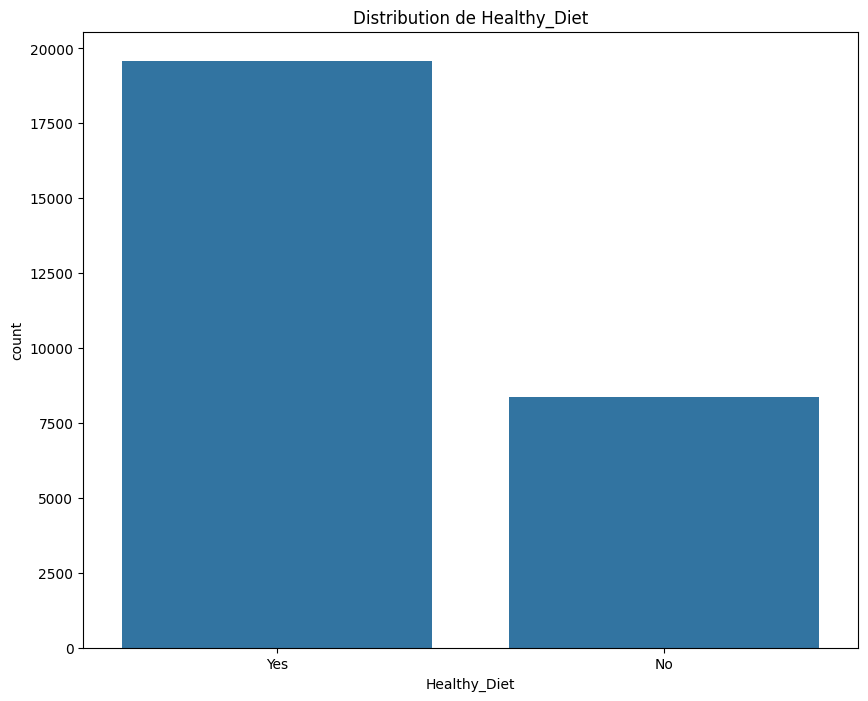

Smoking_History


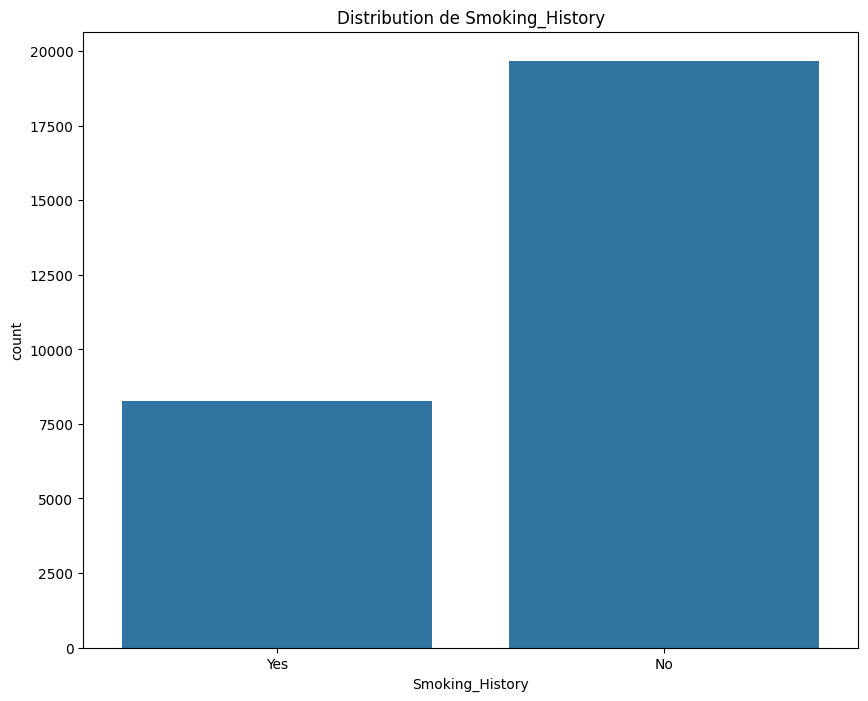

Alcohol_Consumption


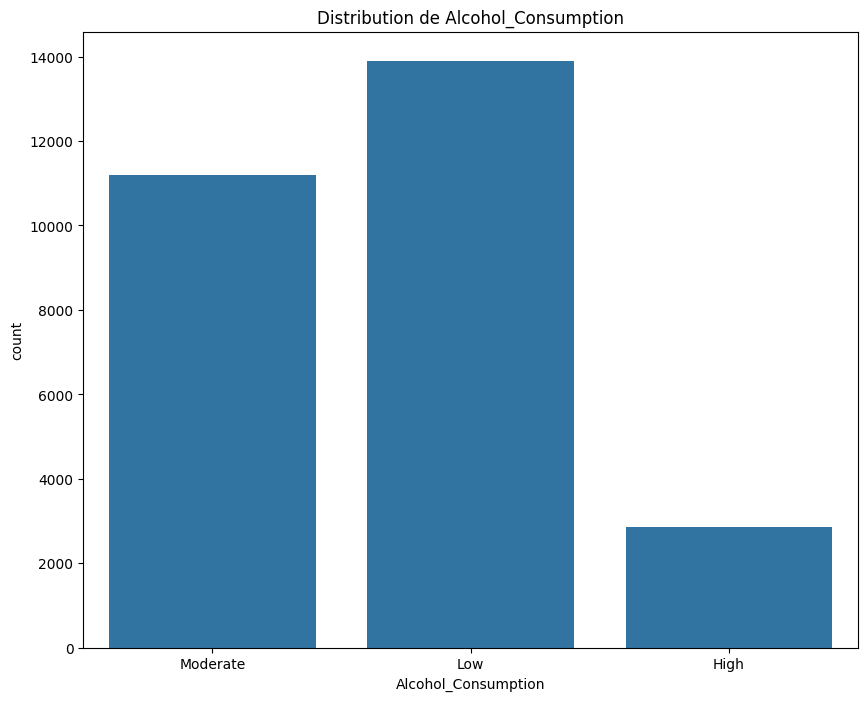

Hypertension


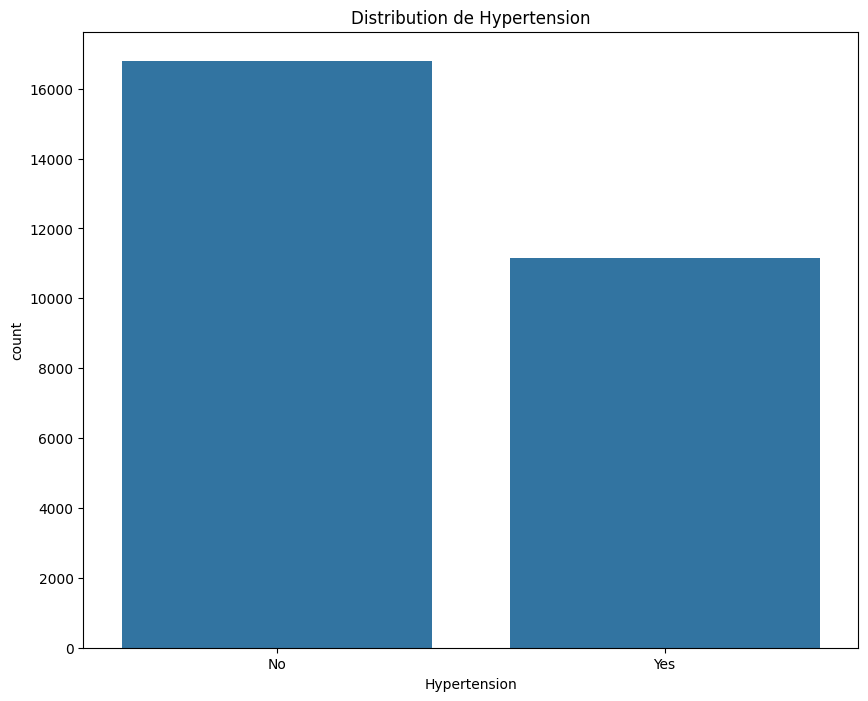

Diabetes


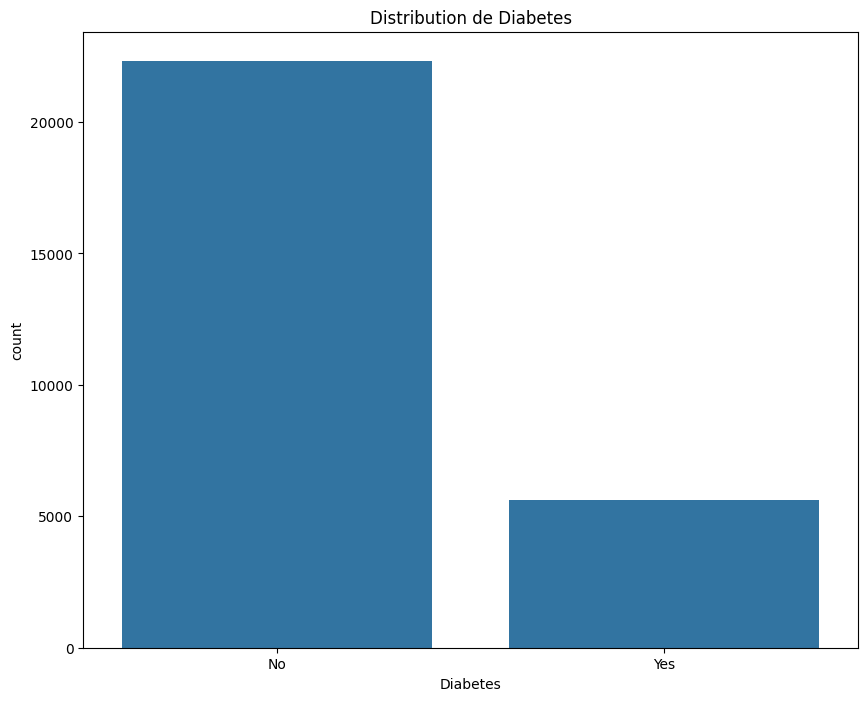

Cholesterol_Level


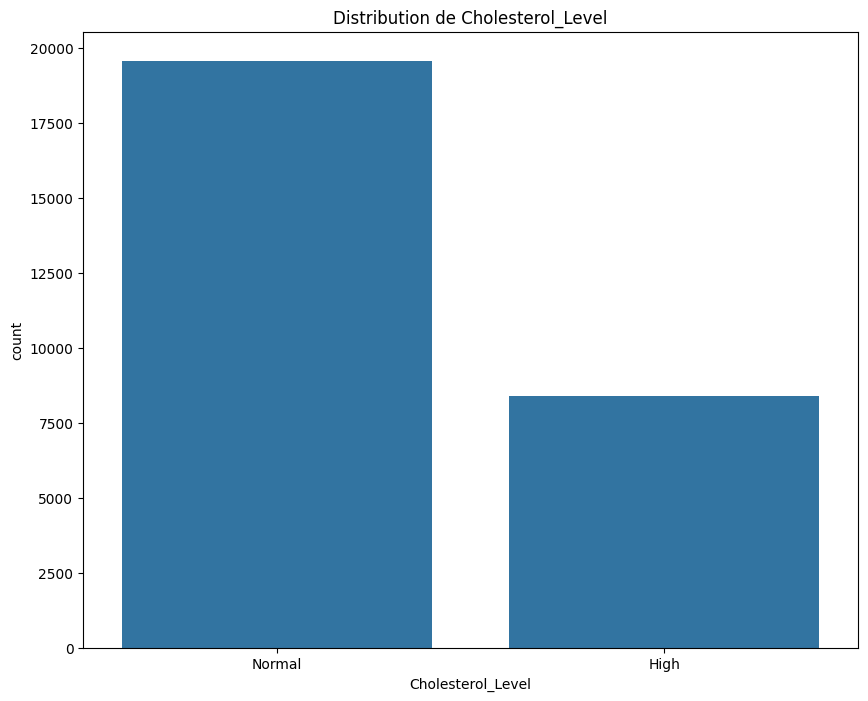

Follow_Up_Required


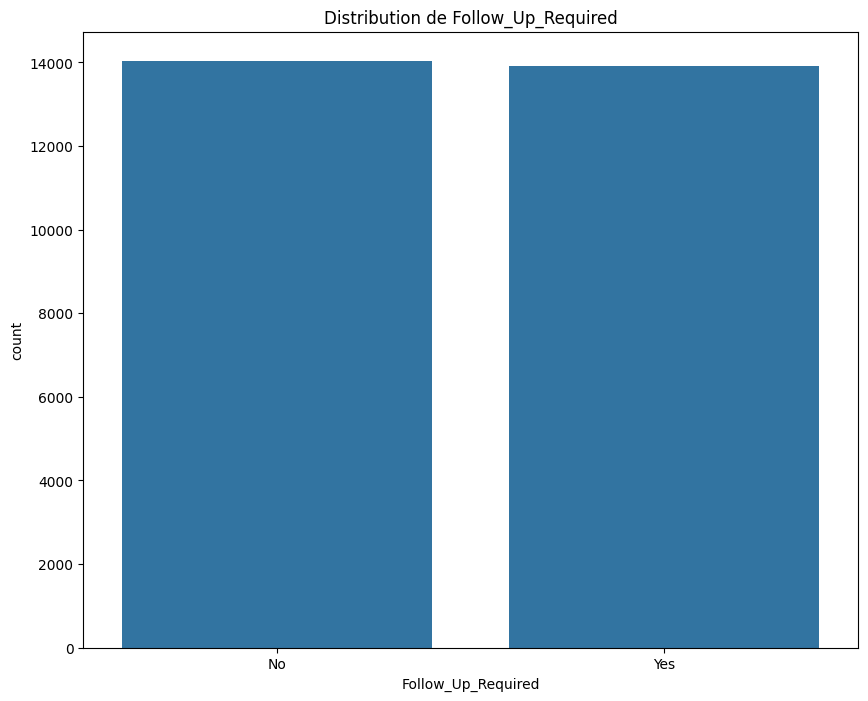

Genetic_Risk_Factors


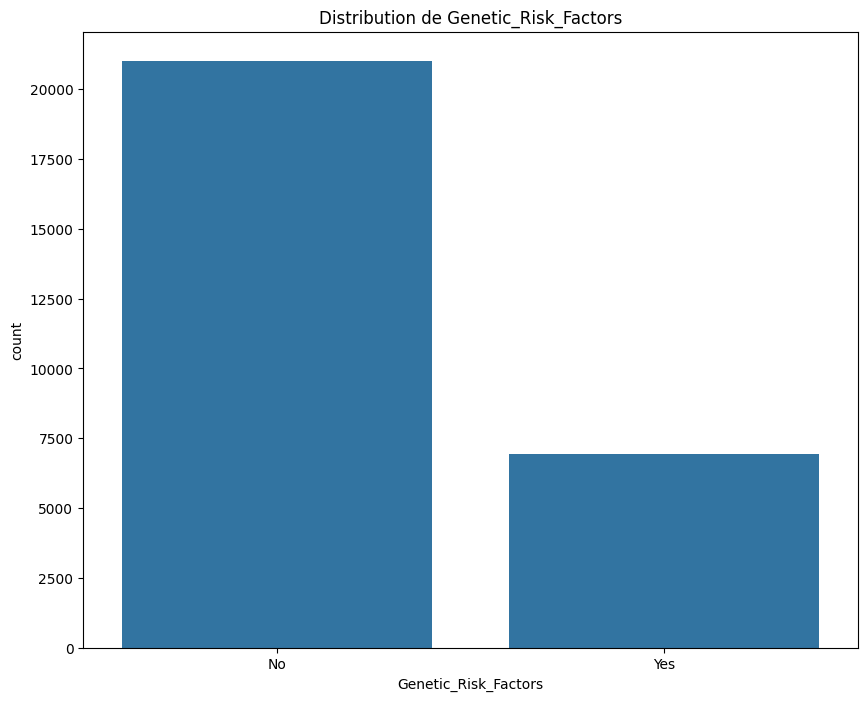

Previous_Cancer_History


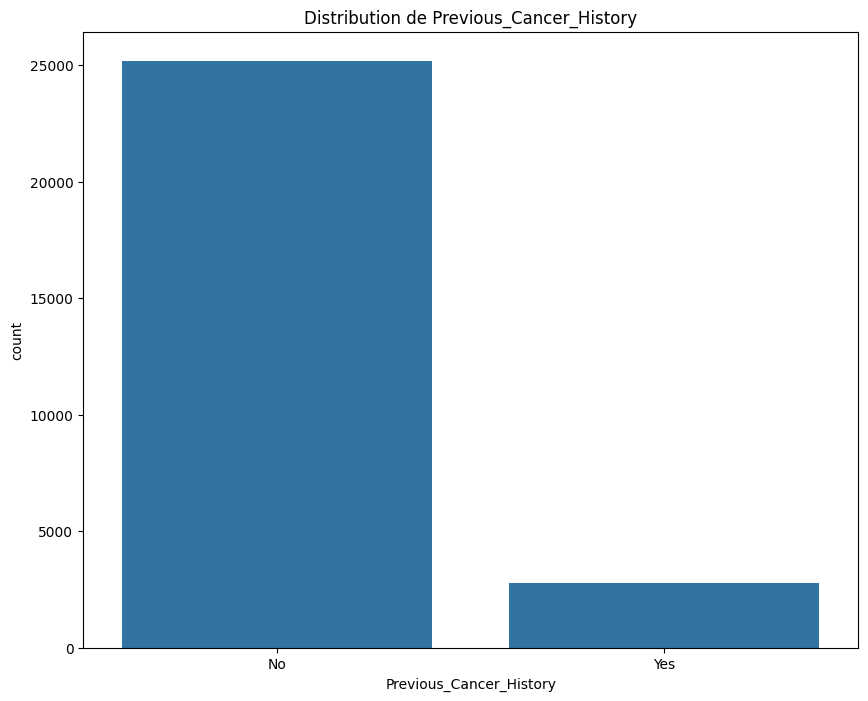

Early_Detection


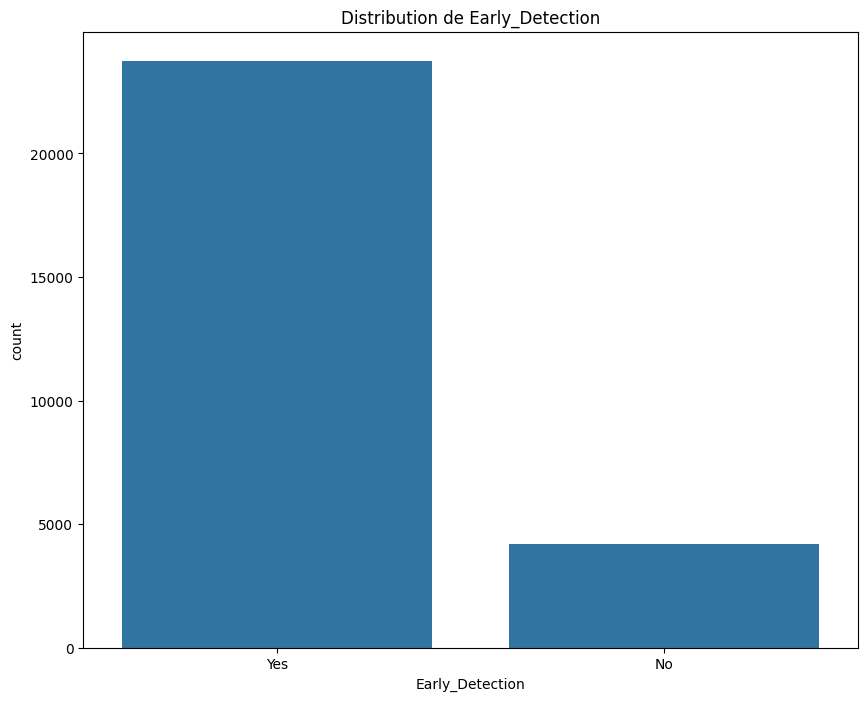

In [11]:
# varibales categorielles
cat_cols = df.select_dtypes(exclude = ['int64',"float64"]).columns
for col in cat_cols:
    print(col)
    plt.figure(figsize=(10,8))
    # plt.pie(data=df, col)
    sns.countplot(data =df, x=col)
    plt.title(f'Distribution de {col}')
    plt.show()

In [12]:
### AGe moyenne des individus dont le cancer  a été decteé

df_age = df.groupby('Early_Detection')['Age'].mean().reset_index()

fig_age = px.bar(x = df_age["Early_Detection"], y=df_age['Age'])
fig_age.show()

In [13]:
df_diabetes = df.groupby('Diabetes')['BMI'].sum().reset_index()

fig_diabtes = px.bar(x = df_diabetes["Diabetes"], y=df_diabetes['BMI'])
fig_diabtes.show()

In [14]:
fig_psa= px.line(x=df['PSA_Level'], y = df['Prostate_Volume'])
# fig_psa.axes_title('PSa_level')
fig_psa.show()


<Axes: >

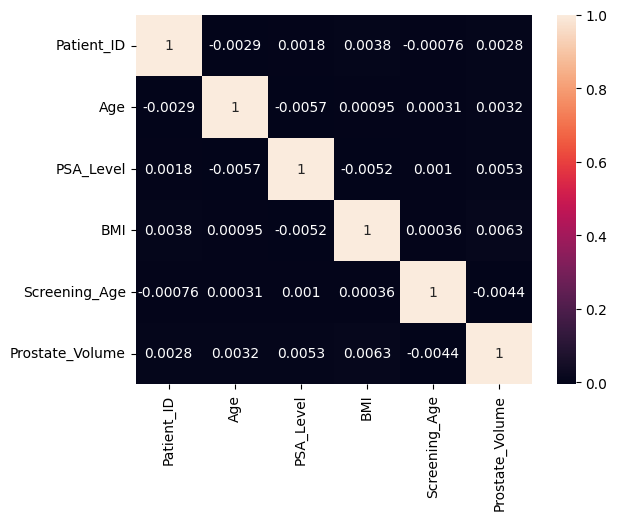

In [15]:
sns.heatmap(df[num_cols].corr(), annot=True)

####  ================ TECHNIQUES DE VALEURS ABERRANTES ET DE NORMALISATION DES DONNÉES ==============

### 1- METHODE DES QUARTILES

Q1 - 1.5*iqR et /ou q3 +1.5*iqr

iqr = q3- q1

In [16]:
### methodes des quartiles

def methode_quartiles(data, col):
    
    # calcul du q1(le premier quartile)
    q1 = data[col].quantile(0.25) # (q1 = np.quantile(data[col], 0.25))
    q3 = data[col].quantile(0.75) #q3
    iqr = q3 - q1
    
    low_bounce = q1 - 1.5*iqr
    sup_bounce = q3 + 1.5*iqr
    
    df_extrems = data[~((data[col] < low_bounce) | (data[col] > sup_bounce))]
    return df_extrems

#### 2- Methodes de Zscores

In [17]:
def methode_zscores(data, col):
    
    # z = (moy - std) / df.shape[0]
    moy = np.mean(data[col])
    std_col = np.std(data[col], ddof=1)
    threshold = 3
    
    zscores = np.abs((data[col] -moy)/std_col)
    data_filtered = data[zscores <= threshold]
    
    return zscores, data_filtered

#### 3 -Methode de winsorisation

lower_bound = df[colonne].quantile(0.01)
upper_bound = df[colonne].quantile(0.99)

Remplacer le 1% des valeurs extremes les plus élévées par la valeur du 99e percentile

### Normalisation des données 

#### IsolationForest

In [18]:
from sklearn.ensemble import IsolationForest

def isolation_forest():
    isof = IsolationForest(contamination=0.1)
    isof.fit(df[[col]])
    df['anomalie'] = isof.predict(df[col])
    return df

In [19]:
### local_outliers_factor
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

### LabelEncoder

In [20]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

### label
data = df.copy()
cat_cols = data.select_dtypes(exclude = ['int64', 'float64']).columns
def encoder_label():
    encoder_label = LabelEncoder()
    for col in cat_cols:
        data[col] = encoder_label.fit_transform(data[col])
        data.head(5)

In [21]:
df.dtypes

Patient_ID                   int64
Age                          int64
Family_History              object
Race_African_Ancestry       object
PSA_Level                  float64
DRE_Result                  object
Biopsy_Result               object
Difficulty_Urinating        object
Weak_Urine_Flow             object
Blood_in_Urine              object
Pelvic_Pain                 object
Back_Pain                   object
Erectile_Dysfunction        object
Cancer_Stage                object
Treatment_Recommended       object
Survival_5_Years            object
Exercise_Regularly          object
Healthy_Diet                object
BMI                        float64
Smoking_History             object
Alcohol_Consumption         object
Hypertension                object
Diabetes                    object
Cholesterol_Level           object
Screening_Age                int64
Follow_Up_Required          object
Prostate_Volume            float64
Genetic_Risk_Factors        object
Previous_Cancer_Hist

In [22]:
data.dtypes

Patient_ID                   int64
Age                          int64
Family_History              object
Race_African_Ancestry       object
PSA_Level                  float64
DRE_Result                  object
Biopsy_Result               object
Difficulty_Urinating        object
Weak_Urine_Flow             object
Blood_in_Urine              object
Pelvic_Pain                 object
Back_Pain                   object
Erectile_Dysfunction        object
Cancer_Stage                object
Treatment_Recommended       object
Survival_5_Years            object
Exercise_Regularly          object
Healthy_Diet                object
BMI                        float64
Smoking_History             object
Alcohol_Consumption         object
Hypertension                object
Diabetes                    object
Cholesterol_Level           object
Screening_Age                int64
Follow_Up_Required          object
Prostate_Volume            float64
Genetic_Risk_Factors        object
Previous_Cancer_Hist

In [23]:
df.head(10)

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,No,Yes,5.07,Normal,Benign,No,No,No,...,Moderate,No,No,Normal,45,No,46.0,No,No,Yes
1,2,68,No,Yes,10.24,Normal,Benign,Yes,No,No,...,Low,No,No,High,65,No,78.2,No,No,Yes
2,3,54,No,No,13.79,Normal,Benign,No,No,No,...,Low,No,No,Normal,61,No,21.1,No,No,Yes
3,4,82,No,No,8.03,Abnormal,Benign,No,No,No,...,Low,No,No,Normal,47,Yes,79.9,No,Yes,Yes
4,5,47,Yes,No,1.89,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,72,No,32.0,No,No,Yes
5,6,60,Yes,No,9.80,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,67,No,66.2,Yes,No,Yes
6,7,78,No,No,9.27,Normal,Benign,Yes,No,No,...,Moderate,No,Yes,Normal,63,Yes,47.5,No,No,Yes
7,8,58,Yes,Yes,2.45,Normal,Malignant,No,No,No,...,Moderate,Yes,Yes,Normal,40,Yes,70.1,No,No,Yes
8,9,62,Yes,No,3.97,Abnormal,Benign,No,Yes,No,...,Low,Yes,No,High,73,Yes,28.5,No,No,No
9,10,50,Yes,Yes,10.24,Abnormal,Benign,Yes,No,No,...,Moderate,No,No,High,67,No,74.5,No,No,Yes


In [24]:
data.head(10)

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,No,Yes,5.07,Normal,Benign,No,No,No,...,Moderate,No,No,Normal,45,No,46.0,No,No,Yes
1,2,68,No,Yes,10.24,Normal,Benign,Yes,No,No,...,Low,No,No,High,65,No,78.2,No,No,Yes
2,3,54,No,No,13.79,Normal,Benign,No,No,No,...,Low,No,No,Normal,61,No,21.1,No,No,Yes
3,4,82,No,No,8.03,Abnormal,Benign,No,No,No,...,Low,No,No,Normal,47,Yes,79.9,No,Yes,Yes
4,5,47,Yes,No,1.89,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,72,No,32.0,No,No,Yes
5,6,60,Yes,No,9.80,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,67,No,66.2,Yes,No,Yes
6,7,78,No,No,9.27,Normal,Benign,Yes,No,No,...,Moderate,No,Yes,Normal,63,Yes,47.5,No,No,Yes
7,8,58,Yes,Yes,2.45,Normal,Malignant,No,No,No,...,Moderate,Yes,Yes,Normal,40,Yes,70.1,No,No,Yes
8,9,62,Yes,No,3.97,Abnormal,Benign,No,Yes,No,...,Low,Yes,No,High,73,Yes,28.5,No,No,No
9,10,50,Yes,Yes,10.24,Abnormal,Benign,Yes,No,No,...,Moderate,No,No,High,67,No,74.5,No,No,Yes


### OrdinalEncoder

In [25]:
data_pre = df.copy()
encoder_label = OrdinalEncoder()
for col in cat_cols:
    data_pre[col] = encoder_label.fit_transform(data_pre[[col]])
data_pre.head(10)
 

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,0.0,1.0,5.07,1.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,1.0,45,0.0,46.0,0.0,0.0,1.0
1,2,68,0.0,1.0,10.24,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,65,0.0,78.2,0.0,0.0,1.0
2,3,54,0.0,0.0,13.79,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,61,0.0,21.1,0.0,0.0,1.0
3,4,82,0.0,0.0,8.03,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,47,1.0,79.9,0.0,1.0,1.0
4,5,47,1.0,0.0,1.89,1.0,1.0,1.0,1.0,0.0,...,2.0,1.0,0.0,1.0,72,0.0,32.0,0.0,0.0,1.0
5,6,60,1.0,0.0,9.80,1.0,1.0,1.0,1.0,0.0,...,2.0,1.0,0.0,1.0,67,0.0,66.2,1.0,0.0,1.0
6,7,78,0.0,0.0,9.27,1.0,0.0,1.0,0.0,0.0,...,2.0,0.0,1.0,1.0,63,1.0,47.5,0.0,0.0,1.0
7,8,58,1.0,1.0,2.45,1.0,1.0,0.0,0.0,0.0,...,2.0,1.0,1.0,1.0,40,1.0,70.1,0.0,0.0,1.0
8,9,62,1.0,0.0,3.97,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,73,1.0,28.5,0.0,0.0,0.0
9,10,50,1.0,1.0,10.24,0.0,0.0,1.0,0.0,0.0,...,2.0,0.0,0.0,0.0,67,0.0,74.5,0.0,0.0,1.0


### Encodage par la frequence et par la moyenne

In [26]:
### encodage ppar freq

data_fre = df.copy()
for col in data_fre.select_dtypes(exclude=['int64', 'float64']).columns:
    data_fre[col] = data_fre[col].map(data_fre[col].value_counts())
data_fre.head(10)

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,19604,5536,5.07,23742,19549,21054,19424,25087,...,11192,16791,22318,19559,45,14035,46.0,21013,25183,23747
1,2,68,19604,5536,10.24,23742,19549,6891,19424,25087,...,13897,16791,22318,8386,65,14035,78.2,21013,25183,23747
2,3,54,19604,22409,13.79,23742,19549,21054,19424,25087,...,13897,16791,22318,19559,61,14035,21.1,21013,25183,23747
3,4,82,19604,22409,8.03,4203,19549,21054,19424,25087,...,13897,16791,22318,19559,47,13910,79.9,21013,2762,23747
4,5,47,8341,22409,1.89,23742,8396,6891,8521,25087,...,11192,11154,22318,19559,72,14035,32.0,21013,25183,23747
5,6,60,8341,22409,9.80,23742,8396,6891,8521,25087,...,11192,11154,22318,19559,67,14035,66.2,6932,25183,23747
6,7,78,19604,22409,9.27,23742,19549,6891,19424,25087,...,11192,16791,5627,19559,63,13910,47.5,21013,25183,23747
7,8,58,8341,5536,2.45,23742,8396,21054,19424,25087,...,11192,11154,5627,19559,40,13910,70.1,21013,25183,23747
8,9,62,8341,22409,3.97,4203,19549,21054,8521,25087,...,13897,11154,22318,8386,73,13910,28.5,21013,25183,4198
9,10,50,8341,5536,10.24,4203,19549,6891,19424,25087,...,11192,16791,22318,8386,67,14035,74.5,21013,25183,23747


In [27]:
data_moy = df.copy()
for col in data_moy.select_dtypes(exclude=['int64', 'float64']).columns:
    data_moy[col] = data_moy[col].map(data_moy[col].value_counts())
data_moy.head(10)

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,19604,5536,5.07,23742,19549,21054,19424,25087,...,11192,16791,22318,19559,45,14035,46.0,21013,25183,23747
1,2,68,19604,5536,10.24,23742,19549,6891,19424,25087,...,13897,16791,22318,8386,65,14035,78.2,21013,25183,23747
2,3,54,19604,22409,13.79,23742,19549,21054,19424,25087,...,13897,16791,22318,19559,61,14035,21.1,21013,25183,23747
3,4,82,19604,22409,8.03,4203,19549,21054,19424,25087,...,13897,16791,22318,19559,47,13910,79.9,21013,2762,23747
4,5,47,8341,22409,1.89,23742,8396,6891,8521,25087,...,11192,11154,22318,19559,72,14035,32.0,21013,25183,23747
5,6,60,8341,22409,9.80,23742,8396,6891,8521,25087,...,11192,11154,22318,19559,67,14035,66.2,6932,25183,23747
6,7,78,19604,22409,9.27,23742,19549,6891,19424,25087,...,11192,16791,5627,19559,63,13910,47.5,21013,25183,23747
7,8,58,8341,5536,2.45,23742,8396,21054,19424,25087,...,11192,11154,5627,19559,40,13910,70.1,21013,25183,23747
8,9,62,8341,22409,3.97,4203,19549,21054,8521,25087,...,13897,11154,22318,8386,73,13910,28.5,21013,25183,4198
9,10,50,8341,5536,10.24,4203,19549,6891,19424,25087,...,11192,16791,22318,8386,67,14035,74.5,21013,25183,23747


### ICI JE METS EN PLACE UN PIPELINE POUR TOUS LE PRETRAITEMENT DE DEUX MANIERES .

Donc le pipeline 1 va prendre en le (label Encoder et Normalisation des données)
et le pipeline 2 va prendre en compte (le OrdinalEncoder et Normalisationn des données)

#### AVec LabelENcoder

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, GroupKFold, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_selector, make_column_transformer



y = LabelEncoder().fit_transform(df['Early_Detection'])
X = df.drop(columns=['Patient_ID','Early_Detection'],axis=1)

num_cols = X.select_dtypes(exclude=['object', 'bool']).columns
cat_cols = X.select_dtypes(exclude=['float64','int64']).columns

pipeline_label = Pipeline(
    steps=[
        ('encoder_hot', OneHotEncoder(handle_unknown='ignore', sparse_output=True))
    ]
)

pipeline_numeric = Pipeline(
    steps=[
        ('scaler_transform', StandardScaler())
    ]
)

pipeline_ordinal = Pipeline(
    steps=[
        ('ordinal_encoder', OrdinalEncoder())
    ]
)

### preprocessor avec label encoder
preprocessor_label = ColumnTransformer(
    transformers=[
        ('num', pipeline_numeric, num_cols),
        ('cat', pipeline_label, cat_cols)
    ]
)

# preprocessor avec ordinal encoder
preprocessor_ordinal = ColumnTransformer(
    transformers=[
        ('num', pipeline_numeric, num_cols),
        ('cat',pipeline_ordinal, cat_cols)
    ]
)


In [40]:
preprocessor_label

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


In [41]:
preprocessor_ordinal

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,copy,True
,with_mean,True
,with_std,True


#### Modelisation avec OrdinalEncoder

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_recall_curve, precision_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

# X = df.drop(columns=['Patient_ID', 'Early_Detection'], axis=1)
# y = LabelEncoder().fit_transform(df['Early_Detection'])

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)

model_label = Pipeline(
    steps=[
        ('prep_label', preprocessor_label),
        ('logistic_regressor_label', LogisticRegression(penalty='l2', solver='lbfgs'))
    ]
)

model_ordinal = Pipeline(
    steps=[
        ('prep_ordinal', preprocessor_ordinal),
        ('logistic_regressor_label', LogisticRegression(penalty='l2', solver='lbfgs'))  
    ]
)
cross_label = cross_val_score(model_label, xtrain, ytrain, cv=5, scoring='f1')


print("=============== MODELISATION AVEC MODEL(LABEL ENCODER)===============")

print(f"Scores label : {np.mean(cross_label)}")
print(f"Scores: {cross_label}")




=============== MODELISATION AVEC MODEL(LABEL ENCODER)===============
Scores label : 0.9188636517316852
Scores: [0.91876209 0.91888904 0.91888904 0.91888904 0.91888904]


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, classification_report

# Paramètres à tester dans logistic regression
param_grid = {
    'logistic_regressor_label__C': [0.01, 0.1, 1, 10, 100],
    'logistic_regressor_label__penalty': ['l2', 'l1',"elasticnet"],
    'logistic_regressor_label__solver': ['lbfgs', 'liblinear', "saga"],
    'logistic_regressor_label__max_iter': [200, 300,500]
}

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model_label,   # ou model_label
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(xtrain, ytrain)

print("===== BEST PARAMETERS =====")
print(grid_search.best_params_)

print("\n===== BEST SCORE (CV F1) =====")
print(grid_search.best_score_)

# Évaluation sur les données de test
best_model = grid_search.best_estimator_
ypred = best_model.predict(xtest)

print("\n===== TEST METRICS =====")
print("F1 Score:", f1_score(ytest, ypred))
print("Accuracy Score:", accuracy_score(ytest, ypred))
print("Precision Score:", precision_score(ytest, ypred))
print(classification_report(ytest, ypred))


In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

model = ImbPipeline(
    steps=[
        ('prep', preprocessor_label),
        ('smote', SMOTE()),
        ('log_reg', LogisticRegression(max_iter=500))
    ]
)

# Paramètres à tester dans logistic regression
param_grid = [

    # Logistic Regression
    {
        'clf': [LogisticRegression(max_iter=500)],
        'clf__C': [0.01, 0.1, 1, 10, 100],
        'clf__penalty': ['l2'],
        'clf__solver': ['lbfgs'],
    },

    # Random Forest
    {
        'clf': [RandomForestClassifier()],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [10, 20, None],
        'clf__min_samples_split': [2, 5],
    },

    # XGBoost
    {
        'clf': [XGBClassifier(eval_metric='logloss')],
        'clf__n_estimators': [100, 200],
        'clf__max_depth': [3, 6],
        'clf__learning_rate': [0.01, 0.1],
    }
]

# GridSearchCV
grid_search = GridSearchCV(
    estimator=model,   # ou model_label
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(xtrain, ytrain)

print("===== BEST PARAMETERS =====")
print(grid_search.best_params_)

print("\n===== BEST SCORE (CV F1) =====")
print(grid_search.best_score_)

# Évaluation sur les données de test
best_model = grid_search.best_estimator_
ypred = best_model.predict(xtest)

print("\n===== TEST METRICS =====")
print("F1 Score:", f1_score(ytest, ypred))
print("Accuracy Score:", accuracy_score(ytest, ypred))
print("Precision Score:", precision_score(ytest, ypred))
print(classification_report(ytest, ypred))


In [ ]:
#########################################
# 6. Feature Importance (automatique)
#########################################

# Récupérer les noms de features après OneHot
feature_names = grid_search.best_estimator_.named_steps['prep'].get_feature_names_out()

clf = grid_search.best_estimator_.named_steps['clf']

if hasattr(clf, 'feature_importances_'):
    importances = clf.feature_importances_
elif hasattr(clf, 'coef_'):
    importances = np.abs(clf.coef_[0])
else:
    importances = None

if importances is not None:
    fi = pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    }).sort_values("importance", ascending=False)

    print("\n===== TOP FEATURES =====")
    print(fi.head(20))